In [1804]:
import numpy as np
import pandas as pd 
from datasets import load_dataset
import tqdm as tqdm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from utils.regression_utils import adjust_for_inflation
from utils.general_utils import adjust_for_inflation_final_dataset
from sklearn.preprocessing import StandardScaler


In [1805]:
books_movie_dataset = pd.read_csv("../data/final_dataset.csv")
similarites = load_dataset("ada-datadruids/bookfilm_summaries_with_similarity_and_sentiment")
similarites_df = similarites['train'].to_pandas()


In [1806]:
books_movie_dataset_n= pd.merge(books_movie_dataset, similarites_df, on = 'movie_id', how ='left')
books_movie_dataset_n.dropna(subset='similarity', inplace=True)
books_movie_dataset_n['similarity']

5       0.451876
6       0.559594
7       0.344548
8       0.669707
14      0.852735
          ...   
1857    0.704500
1861    0.677893
1863    0.686086
1864    0.762416
1866    0.825776
Name: similarity, Length: 837, dtype: float64

In [1807]:
books_movie_dataset_cleaned = books_movie_dataset_n[books_movie_dataset_n['revenue'] != 0]
relevant_columns = ['BookTitle','runtime_y','budget','revenue','movie_name_x','release_date','movie_year','similarity','film_sentiment_score','book_sentiment_score']
relevant_movies = books_movie_dataset_cleaned[relevant_columns]
relevant_movies = adjust_for_inflation(relevant_movies, ['budget', 'revenue'], is_plotting_enabled=False)
relevant_movies.drop(columns=['revenue','budget','release_date'], inplace=True)
relevant_movies.columns

c:\Users\manse\Desktop\MA3\ADA\MS3\ada-2024-project-datadruids\src\utils\regression_utils.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\manse\Desktop\MA3\ADA\MS3\ada-2024-project-datadruids\src\utils\regression_utils.py:52: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index(['BookTitle', 'runtime_y', 'movie_name_x', 'movie_year', 'similarity',
       'film_sentiment_score', 'book_sentiment_score', 'adjusted_budget',
       'adjusted_revenue'],
      dtype='object')

In [1808]:
multi_adapt_2 = relevant_movies[relevant_movies.groupby('BookTitle').BookTitle.transform(len) >= 2]
multi_adapt_3 = relevant_movies[relevant_movies.groupby('BookTitle').BookTitle.transform(len) >= 3]
multi_adapt_4 = relevant_movies[relevant_movies.groupby('BookTitle').BookTitle.transform(len) >= 4]
multi_adapt_5 = relevant_movies[relevant_movies.groupby('BookTitle').BookTitle.transform(len) >= 5]

Booktitles_2 = multi_adapt_2.value_counts('BookTitle').index.to_list()
Booktitles_3 = multi_adapt_3.value_counts('BookTitle').index.to_list()
Booktitles_4 = multi_adapt_4.value_counts('BookTitle').index.to_list()
Booktitles_5 = multi_adapt_5.value_counts('BookTitle').index.to_list()

target_columns = ['runtime_y', 'movie_year','similarity','adjusted_budget', 'adjusted_revenue']
dataframe_columns = ['runtime_y', 'movie_year','similarity','adjusted_budget', 'adjusted_revenue', 'BookTitle']

Std_2_films = pd.DataFrame(columns=dataframe_columns)
Std_3_films = pd.DataFrame(columns=dataframe_columns)
Std_4_films = pd.DataFrame(columns=dataframe_columns)
Std_5_films = pd.DataFrame(columns=dataframe_columns)

for title in Booktitles_2:
    df = multi_adapt_2[multi_adapt_2['BookTitle']==title]
    df = df[target_columns]
    scaler = StandardScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    df.sort_values('adjusted_revenue', ascending=False, inplace=True)
    df['BookTitle'] = title
    Std_2_films = pd.concat([Std_2_films,df])
Std_2_films.reset_index(drop=True,inplace=True)

for title in Booktitles_3:
    df = multi_adapt_3[multi_adapt_3['BookTitle']==title]
    df = df[target_columns]
    scaler = StandardScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    df.sort_values('adjusted_revenue', ascending=False, inplace=True)
    df['BookTitle'] = title
    Std_3_films = pd.concat([Std_3_films,df])
Std_3_films.reset_index(drop=True,inplace=True)

for title in Booktitles_4:
    df = multi_adapt_4[multi_adapt_4['BookTitle']==title]
    df = df[target_columns]
    scaler = StandardScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    df.sort_values('adjusted_revenue', ascending=False, inplace=True)
    df['BookTitle'] = title
    Std_4_films = pd.concat([Std_4_films,df])
Std_4_films.reset_index(drop=True,inplace=True)

for title in Booktitles_5:
    df = multi_adapt_5[multi_adapt_3['BookTitle']==title]
    df = df[target_columns]
    scaler = StandardScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    df.sort_values('adjusted_revenue', ascending=False, inplace=True)
    df['BookTitle'] = title
    Std_5_films = pd.concat([Std_5_films,df])
Std_5_films.reset_index(drop=True,inplace=True)

Positive_revenue_films_2 = Std_2_films[(Std_2_films['adjusted_revenue']>1.01) | ((Std_2_films['adjusted_revenue'] >0.1)&(Std_2_films['adjusted_revenue']<0.999 ))]
Positive_revenue_films_3 = Std_3_films[(Std_3_films['adjusted_revenue']>0) & (Std_3_films['adjusted_revenue'] !=1.000000)]
Positive_revenue_films_4 = Std_4_films[(Std_4_films['adjusted_revenue']>0) & (Std_4_films['adjusted_revenue'] !=1.000000)]
Positive_revenue_films_5 = Std_5_films[(Std_5_films['adjusted_revenue']>0) & (Std_5_films['adjusted_revenue'] !=1.000000)]
Positive_revenue_films_2



C:\Users\manse\AppData\Local\Temp\ipykernel_48000\2851071356.py:26: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\manse\AppData\Local\Temp\ipykernel_48000\2851071356.py:36: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\manse\AppData\Local\Temp\ipykernel_48000\2851071356.py:46: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dty

,runtime_y,movie_year,similarity,adjusted_budget,adjusted_revenue,BookTitle
0,0.504869,0.173943,0.351785,-0.328208,1.594200,Frankenstein
1,1.781064,1.433530,-1.345154,2.437871,1.359189,Frankenstein
2,-1.213087,-1.631465,1.279729,-0.459989,0.183433,Frankenstein
7,1.442804,-1.267212,1.330674,0.340685,1.998053,The Exorcist
12,-0.829450,-1.688969,0.612689,-0.069306,1.722121,The Wonderful Wizard of Oz
16,-0.736398,-1.683581,0.703022,-0.408079,1.695461,The Adventures of Pinocchio
24,0.064150,-0.564683,-0.001110,0.518915,1.519737,First Blood
28,1.234936,-1.249189,1.135798,-1.291788,1.664451,Jaws
32,-1.263466,1.409428,-0.958688,-1.004831,1.103885,Les Liaisons dangereuses
33,0.081514,-0.805387,1.379726,-0.359406,0.213615,Les Liaisons dangereuses


In [ ]:
datasets = [
    {col: Positive_revenue_films_2[col].values for col in target_columns},
    {col: Positive_revenue_films_3[col].values for col in target_columns},
    {col: Positive_revenue_films_4[col].values for col in target_columns},
    {col: Positive_revenue_films_5[col].values for col in target_columns},
]

# Step 3: Create the initial figure with box plots for the first dataset
fig = go.Figure()

for col in target_columns:
    fig.add_trace(
        go.Box(
            y=datasets[0][col],  # Use the first dataset
            name=col,            # Label the boxplot with the column name
            boxpoints=False      # Do not show points
        )
    )

# Step 4: Define the slider steps
steps = []
for i, dataset in enumerate(datasets):
    step = dict(
        method="update",
        args=[
            {"y": [dataset[col] for col in target_columns]},  # Update y-values for all traces
            {"title": f"Boxplot for Dataset {i + 1}"}         # Update the plot title
        ],
        label=f"Dataset {i + 1}"  # Label for the slider step
    )
    steps.append(step)

# Step 5: Add slider to the layout
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Dataset: "},
    pad={"t": 50},  # Padding to position the slider
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title="Boxplot of Standard deviations for each feature of intrest",
    yaxis_title="Standard deviations"
)

# Display the plot
fig.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x242ee9f0790>,
 'caps': [<matplotlib.lines.Line2D at 0x242efad83d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x242e935ea50>,
 'medians': [<matplotlib.lines.Line2D at 0x242ee6819d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x242ee683ed0>,
 'means': []}

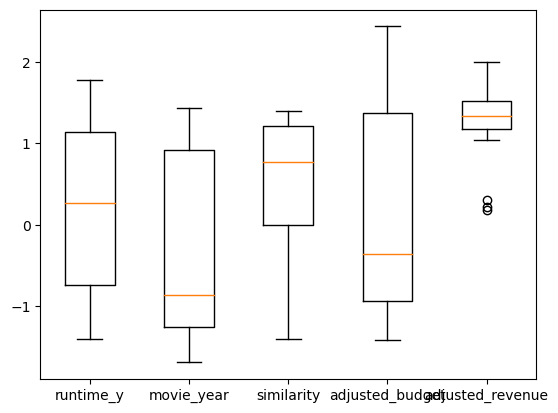

In [1810]:

plt.boxplot(Positive_revenue_films_2[target_columns], labels=target_columns)